<h1>Análise de Exploratoria de dados</h1><h2>Extração, Transformação e Carregamento dos dados</h2>

### Objetivo desta Análise: Aprimoramento de habiiliades ETLs & Responder perguntas utilizando PowerBI

Sobre o DataSet

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.
It is based on BeautifulSoup using Python.
There are 16,598 records. 2 records were dropped due to incomplete information.

<b>Passo a passo geral
    <ul>
    <li> 1.Importar bibliotecas
        <li>2.Carregar os dados
            <li>3.Limpeza dos dados
                <li>4.Análise exploratoria
                    <li>5.Identificação de tendências e padrões
                        <li>6.Conclusão e interpretação dos resultados

<h3>Os valores das vendas estão em milhões (U$)</h3>

In [73]:
# Passo 1

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [75]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 9ED8-F420

 Directory of C:\Users\walli\Documents\GitHub\Projetos-DataScience\video-game-sales

02/17/2023  04:48 PM    <DIR>          .
02/17/2023  04:48 PM    <DIR>          ..
01/19/2023  12:24 PM    <DIR>          .ipynb_checkpoints
02/17/2023  04:48 PM           389,264 An lise de dados.ipynb
01/15/2023  07:23 PM         1,372,380 vgsales.csv
               2 File(s)      1,761,644 bytes
               3 Dir(s)  145,603,604,480 bytes free


In [76]:
# Passo 2

In [77]:
df = pd.read_csv('vgsales.csv')
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [79]:
# Passo 3

# Dados ausentes/faltantes

In [80]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [81]:
df.isna()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False,False


<h4>Testando o impacto dos dados faltantes</h4>

In [82]:
shape_before= df.shape[0]
shape_aft = df.dropna().shape[0]
print(f'Linhas excluídas {shape_before - shape_aft}, Equivalente a {(shape_before - shape_aft)/ df.shape[0]*100} %')

Linhas excluídas 307, Equivalente a 1.8496204361971322 %


In [83]:
df.dropna(inplace = True)
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [84]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Explorando mais os dados

<h4>Explorando Coluna Year</h4>

In [85]:
print(f'Ano mínimo: {df.Year.min()}, Ano Máximo: {df.Year.max()}\nIdade total de publicações:{df.Year.max()-df.Year.min()}')

Ano mínimo: 1980.0, Ano Máximo: 2020.0
Idade total de publicações:40.0


<h4>Plotando Year</h4>

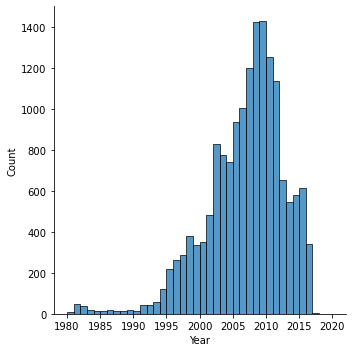

In [86]:
sns.displot(df.Year, bins = 40)

### Observando as colunas

In [87]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [88]:
df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

<h3>Observando a coluna platform</h3>

In [89]:
order_platform = df.Platform.value_counts(ascending = False)
order_platform

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [90]:
order_platform.index

Index(['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA', 'GC',
       '3DS', 'PSV', 'PS4', 'N64', 'SNES', 'XOne', 'SAT', 'WiiU', '2600',
       'NES', 'GB', 'DC', 'GEN', 'NG', 'SCD', 'WS', '3DO', 'TG16', 'GG',
       'PCFX'],
      dtype='object')

<h4>Número total de Plataformas</h4>

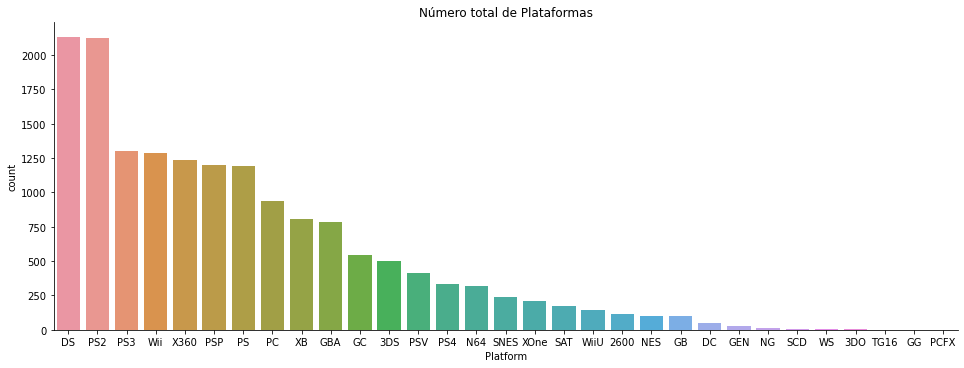

In [91]:
sns.catplot(data = df, x = 'Platform', kind = 'count', aspect =2.7, order = order_platform.index).set(title='Número total de Plataformas')

In [92]:
df.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


<h4>Explorando coluna Genre</h4>

In [93]:
df.Genre.value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In [94]:
qtd_genero = df.Genre.value_counts()
qtd_genero

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

<h4>Número total dos generos</h4>

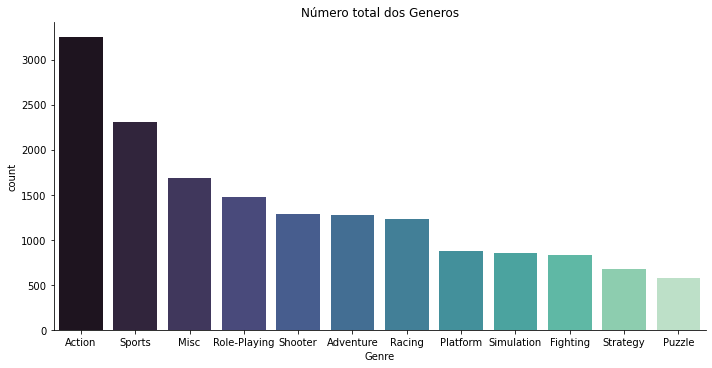

In [95]:
sns.catplot(x = 'Genre', kind = 'count', data = df, aspect=2, order=qtd_genero.index, palette = 'mako').set(title='Número total dos Generos')

# Explorando as colunas de vendas (NA, EU, JP, OTHER, GLOBAL)

In [96]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<h2><b> Estatistica descritiva </b></h2>

<h3> Estatistica descritiva:</h3>
<ul><b>Medidas de tendencia centrais</b>
    <li>Média</li>
    <li>Moda</li>
    <li>Mediana e Quantil</li>
</ul>
<ul><b>Medidas de Dispersão</b>
    <li>Amplitude</li>
    <li>Variância</li>
    <li>Desvio Padrão</li>
    <li>Desvio absoluto</li>

In [97]:
df.columns[6:]

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], dtype='object')

<h4>Média</h4>

In [98]:
df[df.columns[6:]].mean()

NA_Sales        0.265647
EU_Sales        0.147731
JP_Sales        0.078833
Other_Sales     0.048426
Global_Sales    0.540910
dtype: float64

<h4>Medidas de tendencia centrais</h4>

In [99]:
df[df.columns[6:]].mode()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0.0,0.0,0.0,0.0,0.02


<b>Os valores da moda podem ser possíveis outliers</b>

<h4>Mediana</h4>

In [100]:
df[df.columns[6:]].median()

NA_Sales        0.08
EU_Sales        0.02
JP_Sales        0.00
Other_Sales     0.01
Global_Sales    0.17
dtype: float64

<b>Medidas de Dispersão</b>

<h4> Ampliitude </h4>

In [101]:
# Os valores da amplitude devem estar mal representados
df[df.columns[6:]].max()-df[df.columns[6:]].min()

NA_Sales        41.49
EU_Sales        29.02
JP_Sales        10.22
Other_Sales     10.57
Global_Sales    82.73
dtype: float64

In [102]:
for i in df[df.columns[6:]].max().keys():
    print(f'Amplitude do {i}: {df[df.columns[6:]].max()[i] - df[df.columns[6:]].min()[i]}')

Amplitude do NA_Sales: 41.49
Amplitude do EU_Sales: 29.02
Amplitude do JP_Sales: 10.22
Amplitude do Other_Sales: 10.57
Amplitude do Global_Sales: 82.72999999999999


<h4>Variância</h4>

In [103]:
df[df.columns[6:]].var()

NA_Sales        0.676395
EU_Sales        0.259389
JP_Sales        0.097269
Other_Sales     0.036131
Global_Sales    2.456569
dtype: float64

<h4>Desvio Padrão</h4>

In [104]:
df[df.columns[6:]].std()

NA_Sales        0.822432
EU_Sales        0.509303
JP_Sales        0.311879
Other_Sales     0.190083
Global_Sales    1.567345
dtype: float64

<h4>Desvio absoluto</h4>

In [105]:
df[df.columns[6:]].mad()

NA_Sales        0.309802
EU_Sales        0.191542
JP_Sales        0.116882
Other_Sales     0.061804
Global_Sales    0.595288
dtype: float64

# Procurando sobre possíveis outliers

In [106]:
df['Global_Sales'].replace([df['Global_Sales'] < .02], [np.nan], inplace = True)

In [107]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [108]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [109]:
df.dropna(inplace= True)

In [110]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


<h2> Utilizando boxplot</h2>

C:\Users\walli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[(0.0, 9.0)]

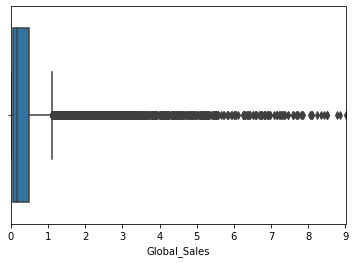

In [111]:
plot1 = sns.boxplot(df['Global_Sales'])
plot1.set(xlim = (0,9))

In [112]:
# Por se tratar de vendas globais, não irei descarta-las, diferente dos anos

C:\Users\walli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


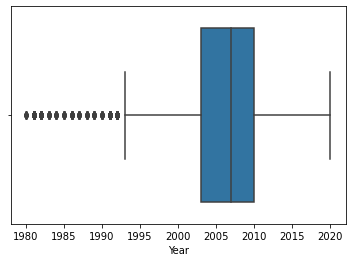

In [113]:
plot2 = sns.boxplot(df['Year'])

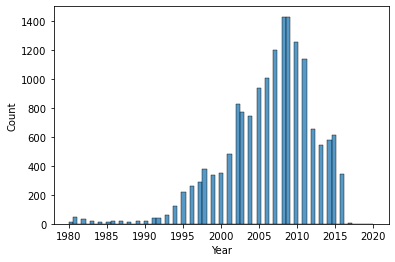

In [114]:
plot2 = sns.histplot(df.Year)

<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

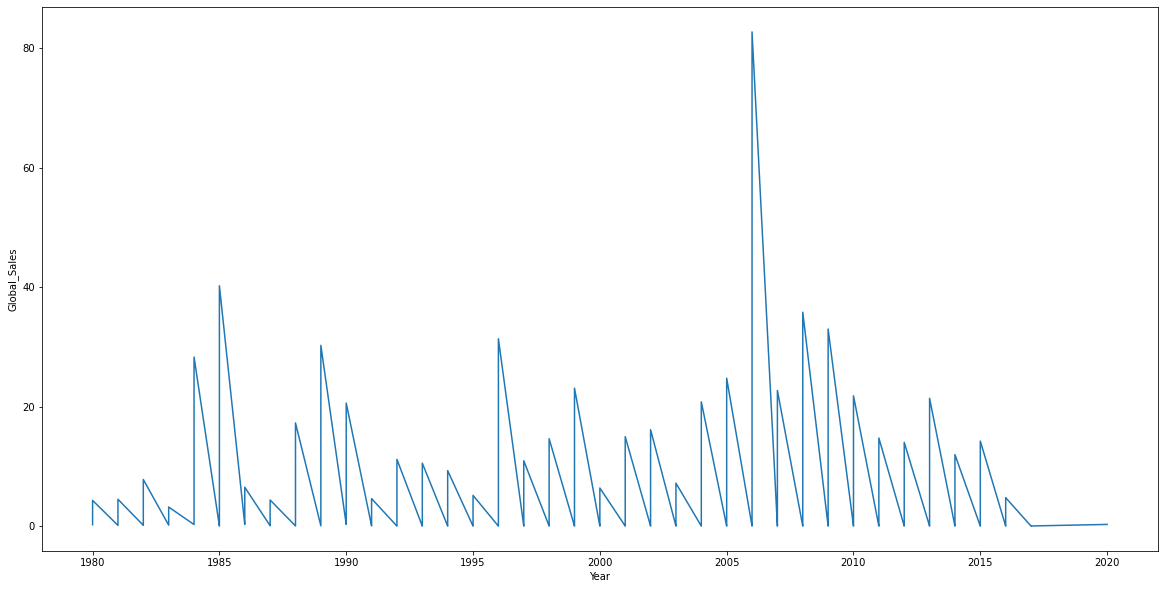

In [115]:
plt.figure(figsize=(20,10))
sns.lineplot(x= 'Year', y = 'Global_Sales', data= df, estimator = None)

In [116]:
# 2016 para frente as vendas caíram drasticamente
df[df['Year']>=2016]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
221,222,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77
271,272,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,Sony Computer Entertainment,1.30,2.07,0.18,0.65,4.20
351,352,Tom Clancy's The Division,PS4,2016.0,Shooter,Ubisoft,1.28,1.61,0.15,0.57,3.61
770,772,Far Cry: Primal,PS4,2016.0,Action,Ubisoft,0.59,1.16,0.06,0.33,2.13
845,847,Tom Clancy's The Division,XOne,2016.0,Shooter,Ubisoft,1.20,0.62,0.00,0.18,2.01
...,...,...,...,...,...,...,...,...,...,...,...
16562,16565,Mighty No. 9,XOne,2016.0,Platform,Deep Silver,0.01,0.00,0.00,0.00,0.01
16569,16572,Resident Evil 4 HD,XOne,2016.0,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01
16570,16573,Farming 2017 - The Simulation,PS4,2016.0,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01
16576,16579,Rugby Challenge 3,XOne,2016.0,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01


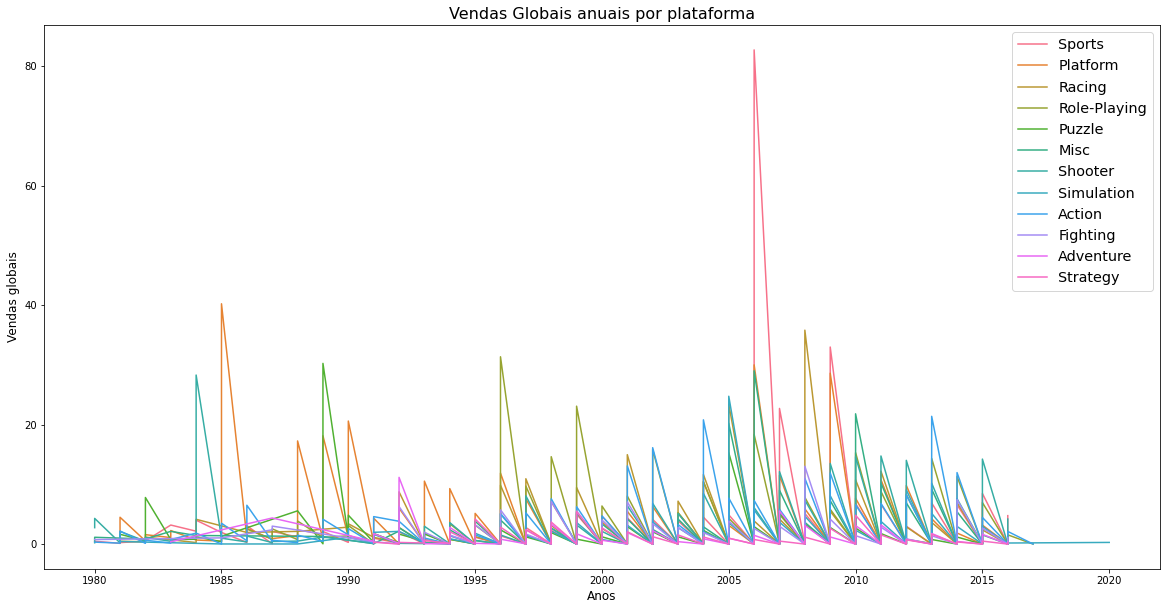

In [117]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x= 'Year', y = 'Global_Sales', data= df, hue = 'Genre', estimator=None)
plt.title("Vendas Globais anuais por plataforma", fontsize = 16)
plt.xlabel('Anos',fontsize = 12)
plt.ylabel("Vendas globais", fontsize = 12)
plt.legend(fontsize = 'x-large')

In [118]:
#dropar anos depois de 2016

In [119]:
before_rows = df.shape[0]
after_rows = df.drop(df[df['Year']>= 2016].index).shape[0]

In [120]:
print(f"Quantidade de linhas excluídas equivalente: {(before_rows - after_rows)/ df.shape[0] * 100} %")

Quantidade de linhas excluídas equivalente: 2.123872076606715 %


In [125]:
df.drop(df[df['Year']>= 2016].index, inplace = True)

In [140]:
df.shape[0]

15945

# Exportando o dados

In [138]:
df.to_csv('C:/Users/walli/Documents/GitHub/Projetos-DataScience/video-game-sales/df_video-game-sales.csv', encoding='utf-8', sep= ',')